# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis:

Trend 1: The first trend I noticed was regarding the lack of trend in regards to cloudiness. There were just as many dots at 100% as there were 0% with a wide range in between.

Trend 2: The second and probably the most obvious was the trend of higher temperatures closer to the equator. There was a clear arch, or spike, in max temperature as you got closer to the equator.

Trend 3: The third trend noticed was in regards to the humidity. There was, on average, a higher percentage of humidity as you got closer to the equator.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

base_url = url + "APPID=" + api_key + "&units=" +units +"&q="

response = requests.get(base_url +"Phoenix").json()

city_weather = pd.DataFrame({"City":cities,"Cloudiness":"","Country":"","Date":"","Humidity":"","Lat":"",
                        "Lng":"","Max Temp":"","Wind Speed":""})
city_weather.head(20)

print("Beginning Data Retrieval")
print("--------------------------------")

# Loop through the data frame, using the city row to pull the information in

for index, row in city_weather.iterrows():
    
    city = row['City']
    
    query_url = base_url + city
    
    print(f"Retreiving data for city number {index} | {city}.")
    response = requests.get(query_url).json()
    
    try:
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Wind Speed'] = response['wind']['speed']
        city_weather.loc[index, 'Country'] = response['sys']['country']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        
    except (KeyError, IndexError):
            print("City not found. Skipping...")
                                                         
print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")

Beginning Data Retrieval
--------------------------------
Retreiving data for city number 0 | wajir.
Retreiving data for city number 1 | avarua.
Retreiving data for city number 2 | atuona.
Retreiving data for city number 3 | georgetown.
Retreiving data for city number 4 | iqaluit.
Retreiving data for city number 5 | rikitea.
Retreiving data for city number 6 | plougastel-daoulas.
Retreiving data for city number 7 | belushya guba.
City not found. Skipping...
Retreiving data for city number 8 | hermanus.
Retreiving data for city number 9 | yen bai.
Retreiving data for city number 10 | humaita.
Retreiving data for city number 11 | busselton.
Retreiving data for city number 12 | tsementnyy.
Retreiving data for city number 13 | upernavik.
Retreiving data for city number 14 | uberlandia.
Retreiving data for city number 15 | korla.
City not found. Skipping...
Retreiving data for city number 16 | jimenez.
Retreiving data for city number 17 | dikson.
Retreiving data for city number 18 | kieta.


Retreiving data for city number 157 | kathmandu.
Retreiving data for city number 158 | tokur.
Retreiving data for city number 159 | davila.
Retreiving data for city number 160 | ramnagar.
Retreiving data for city number 161 | safaga.
City not found. Skipping...
Retreiving data for city number 162 | high level.
Retreiving data for city number 163 | pitimbu.
Retreiving data for city number 164 | stanislav.
Retreiving data for city number 165 | labrea.
City not found. Skipping...
Retreiving data for city number 166 | buchanan.
Retreiving data for city number 167 | saskylakh.
Retreiving data for city number 168 | norman wells.
Retreiving data for city number 169 | mehamn.
Retreiving data for city number 170 | japura.
Retreiving data for city number 171 | ozgon.
City not found. Skipping...
Retreiving data for city number 172 | nuuk.
Retreiving data for city number 173 | fortuna.
Retreiving data for city number 174 | cooma.
Retreiving data for city number 175 | bethel.
Retreiving data for ci

Retreiving data for city number 319 | tessalit.
Retreiving data for city number 320 | caloundra.
Retreiving data for city number 321 | qaqortoq.
Retreiving data for city number 322 | kavieng.
Retreiving data for city number 323 | baglung.
Retreiving data for city number 324 | toktogul.
Retreiving data for city number 325 | nguiu.
City not found. Skipping...
Retreiving data for city number 326 | grand gaube.
Retreiving data for city number 327 | surt.
Retreiving data for city number 328 | pangkalanbuun.
Retreiving data for city number 329 | chisinau.
Retreiving data for city number 330 | ortona.
Retreiving data for city number 331 | waipawa.
Retreiving data for city number 332 | praya.
Retreiving data for city number 333 | oneida.
Retreiving data for city number 334 | naryan-mar.
Retreiving data for city number 335 | mosalsk.
Retreiving data for city number 336 | zhigalovo.
Retreiving data for city number 337 | pljevlja.
Retreiving data for city number 338 | olonets.
Retreiving data for

City not found. Skipping...
Retreiving data for city number 479 | harwich.
Retreiving data for city number 480 | aksum.
Retreiving data for city number 481 | ardakan.
Retreiving data for city number 482 | rengali.
City not found. Skipping...
Retreiving data for city number 483 | ksenyevka.
City not found. Skipping...
Retreiving data for city number 484 | ngukurr.
City not found. Skipping...
Retreiving data for city number 485 | kijang.
Retreiving data for city number 486 | oranjemund.
Retreiving data for city number 487 | cap malheureux.
Retreiving data for city number 488 | vila do maio.
Retreiving data for city number 489 | yumen.
Retreiving data for city number 490 | buala.
Retreiving data for city number 491 | luwuk.
Retreiving data for city number 492 | coquimbo.
Retreiving data for city number 493 | fuerte.
Retreiving data for city number 494 | do gonbadan.
Retreiving data for city number 495 | middlebury.
Retreiving data for city number 496 | kaitangata.
Retreiving data for city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Filling empty row with NA to drop NA's, reset the index and save to csv

city_weather['Country'].replace('', np.nan, inplace=True)

city_weather = city_weather.dropna(how='any').reset_index(drop=True)

city_weather.to_csv("weather_data.csv", index=False)

city_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,wajir,75,KE,1562277011,55,1.75,40.07,79.86,21.34
1,avarua,49,CK,1562276952,68,-21.21,-159.78,71.6,18.34
2,atuona,8,PF,1562277011,71,-9.8,-139.03,80.31,10.63
3,georgetown,40,GY,1562277011,70,6.8,-58.16,84.2,11.41
4,iqaluit,75,CA,1562277012,75,63.75,-68.52,46.4,16.11
5,rikitea,99,PF,1562277012,67,-23.12,-134.97,66.81,23.11
6,plougastel-daoulas,0,FR,1562277012,82,48.37,-4.37,66.2,8.05
7,hermanus,100,ZA,1562277013,99,-34.42,19.24,54,3
8,yen bai,100,VN,1562277013,99,21.7,104.87,73.68,0.47
9,humaita,90,AR,1562277013,71,-24.93,-65.37,51.8,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

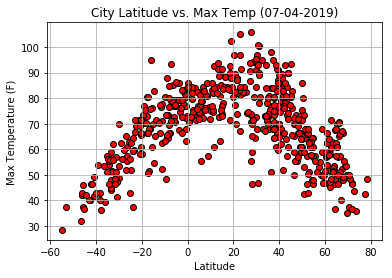

In [37]:
plt.scatter(city_weather['Lat'], city_weather['Max Temp'], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Max Temp (07-04-2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save Figure
plt.savefig("City Latitude vs Max Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

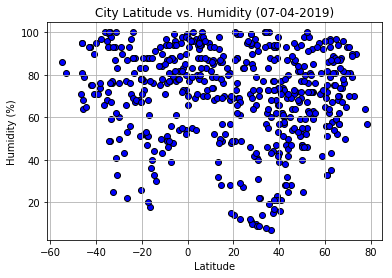

In [38]:
plt.scatter(city_weather['Lat'], city_weather['Humidity'], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (07-04-2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save Figure
plt.savefig("City Latitude vs Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

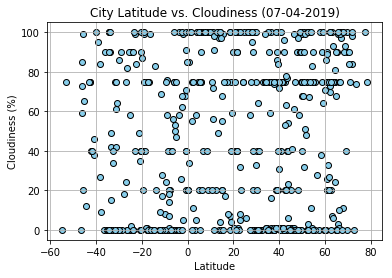

In [39]:
plt.scatter(city_weather['Lat'], city_weather['Cloudiness'], marker="o", facecolors="SkyBlue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07-04-2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save Figure
plt.savefig("City Latitude vs Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

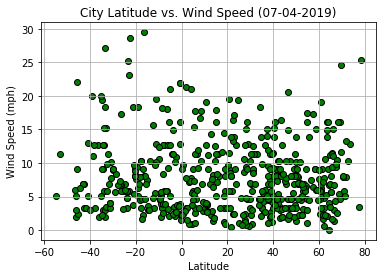

In [40]:
plt.scatter(city_weather['Lat'], city_weather['Wind Speed'], marker="o", facecolors="green", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07-04-2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save Figure
plt.savefig("City Latitude vs Wind Speed.png")

# Show plot
plt.show()